## Introducción

La predicción de adquisición de clientes es fundamental en los negocios modernos, ya que permite optimizar estrategias de marketing, mejorar la asignación de recursos y aumentar la tasa de conversión. Mediante el análisis de variables clave como el comportamiento del cliente o características demográficas, entre otras, las empresas pueden anticipar qué tipo de clientes es más probable que adquieran sus productos o servicios.

Este tipo de análisis no solo ayuda a reducir los costos asociados con la adquisición de clientes, sino que también permite diseñar campañas personalizadas, mejorar la experiencia del cliente y aumentar la retención a largo plazo.

## Descripción del problema

La adquisición de clientes es uno de los principales desafíos para cualquier negocio, ya que implica atraer nuevas personas interesadas en sus productos o servicios. El problema que aborda este dataset es predecir, a partir de datos históricos y variables relevantes, qué clientes tienen mayor probabilidad de ser adquiridos o realizar una conversión exitosa.
Al resolver este problema, las empresas buscan maximizar la eficiencia de sus campañas de marketing, reducir los costos y enfocar sus esfuerzos en clientes con alto potencial. Sin herramientas predictivas, el proceso de adquisición suele ser costoso y poco eficiente, ya que se invierte mucho en estrategias generales que no siempre impactan al público objetivo.

## Objetivo

El propósito de este trabajo es desarrollar un modelo predictivo enfocado en la adquisición de clientes, utilizando datos históricos y análisis exploratorio, con el fin de anticipar qué campañas publicitarias tienen una mayor probabilidad de atraer clientes. Este enfoque permitirá a las empresas tomar decisiones estratégicas más informadas, optimizando la asignación de recursos hacia segmentos de mercado con mayor potencial de conversión y mejorando la eficiencia de las campañas futuras.

## Fuente

Los datos que vamos a trabajar fueron sacados de Kaggle:
 https://www.kaggle.com/code/mayurspawar/customer-acquisition-prediction/notebook

 Este dataset contiene datos sobre promociones realizadas, productos vendidos, costos, ingresos y demografia de los clientes

## Carga de datos y librerias

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv("/content/drive/MyDrive/PROYECTO DATA SCIENCE/media prediction and its cost.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploración de datos

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [23]:
#Este dataset no contiene valores nulos, pero una forma de trabajar12los podria ser la siguiente:

# 1. Eliminar filas con valores nulos
#df_dropna_rows = df.dropna()

# 2. Eliminar columnas con valores nulos
#df_dropna_columns = df.dropna(axis=1)

In [24]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [25]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


Podemos considerar que las siguientes variables tienen relevancia:


**SRP**: Precio sugerido, útil para determinar la efectividad de campañas con descuentos.

**store_sqft, frozen_sqft, meat_sqft**: Tamaño de la tienda y áreas específicas pueden influir en las ventas.

**cost**: Costos de campaña que pueden usarse para analizar la eficiencia económica.

**store_sales**: Monto total del ingreso por ventas por campaña.

**unit_sales**: Volumen de unidades vendidas.

**store_cost**: Refleja los gastos totales de operación de una tienda

**media_type**: Muestra el canal de comunicación en el que se realizo la campaña publicitaria

**promotion_name**: Nombre de la campaña publicitaria


## **HIPOTESIS**
A mayor inversión en costos publicitarios de una campaña, mayor es el ingreso y el volumen de ventas generado por esta.

El éxito de una campaña, medido en términos de ingresos y tasa de conversión, varía significativamente según el canal de comunicación utilizado.

Las campañas con un Costo por Adquisición (CPA) menor presentan un mayor volumen de unidades vendidas.

**Las campañas con mayores ingresos y volumen de ventas suelen implicar mayores costos publicitarios**

In [26]:
# Agrupación por promotion_name
df_grouped = df.groupby('promotion_name').agg({
    'cost': 'sum',
    'store_sales(in millions)': 'mean',
    'unit_sales(in millions)': 'mean'
}).reset_index()
df_grouped = df.groupby('promotion_name').agg({
    'cost': 'sum',
    'store_sales(in millions)': 'mean',
    'unit_sales(in millions)': 'mean'
}).reset_index()

<ipython-input-27-f8e273b3d202>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


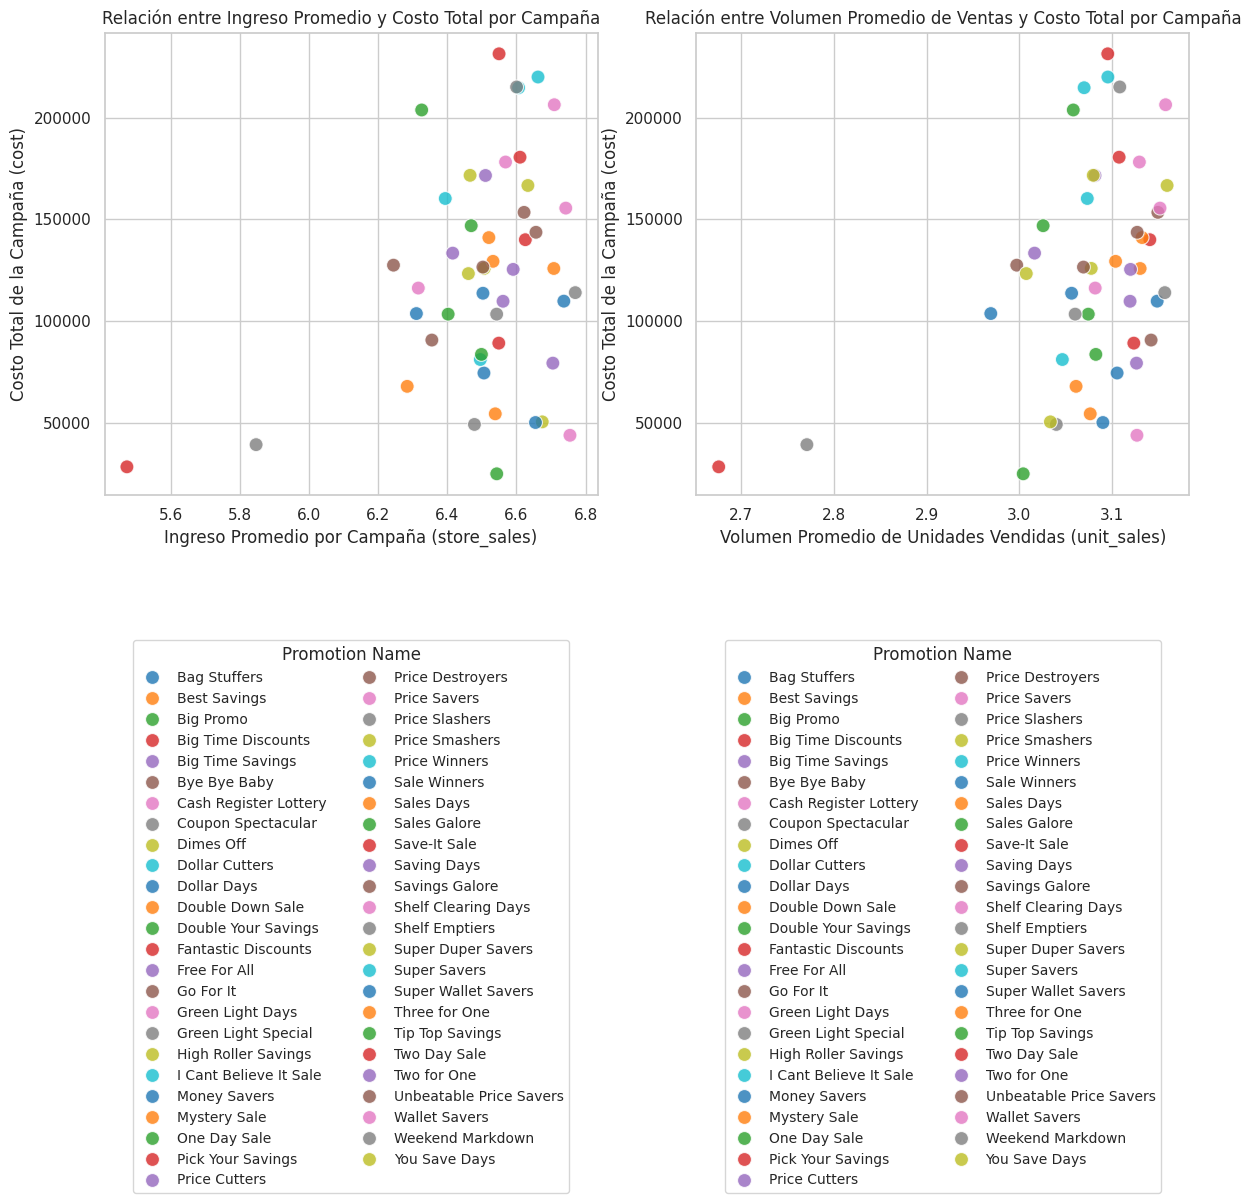

In [27]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 6))

# Gráfico 1: Costo Total vs Ingresos de Ventas Promedio
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_grouped, x='store_sales(in millions)', y='cost', hue='promotion_name', s=100, palette='tab10', alpha=0.8)
plt.xlabel('Ingreso Promedio por Campaña (store_sales)')
plt.ylabel('Costo Total de la Campaña (cost)')
plt.title('Relación entre Ingreso Promedio y Costo Total por Campaña')

# Ajustar la leyenda
plt.legend(title='Promotion Name', bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=2, fontsize='small')

# Gráfico 2: Costo Total vs Volumen Promedio de Unidades Vendidas
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_grouped, x='unit_sales(in millions)', y='cost', hue='promotion_name', s=100, palette='tab10', alpha=0.8)
plt.xlabel('Volumen Promedio de Unidades Vendidas (unit_sales)')
plt.ylabel('Costo Total de la Campaña (cost)')
plt.title('Relación entre Volumen Promedio de Ventas y Costo Total por Campaña')

# Ajustar la leyenda
plt.legend(title='Promotion Name', bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=2, fontsize='small')

plt.tight_layout()
plt.show()

Los datos sugieren que hay una correlación inconsistente entre el costo de la campaña y los resultados en términos de ingresos y volumen de ventas. Esto indica que el éxito de una campaña (medido en ingresos o unidades vendidas) no depende exclusivamente del costo, sino que probablemente involucra otros factores como el canal de comunicación, la segmentación del mercado, o el tipo de campaña.

**El éxito de una campaña, medido en términos de ingresos y tasa de conversión, varía significativamente según el canal de comunicación utilizado.**

Generamos una variable que muestre la tasa de conversion:

In [28]:
df['conversion_rate'] = df['unit_sales(in millions)'] / df['cost']
df[['conversion_rate']].head(10)



,conversion_rate
0,0.031591
1,0.050117
2,0.023764
3,0.020881
4,0.059067
5,0.059067
6,0.041762
7,0.033411
8,0.050117
9,0.035646


<ipython-input-29-7c5236c326ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='media_type', y='conversion_rate', palette='tab10')


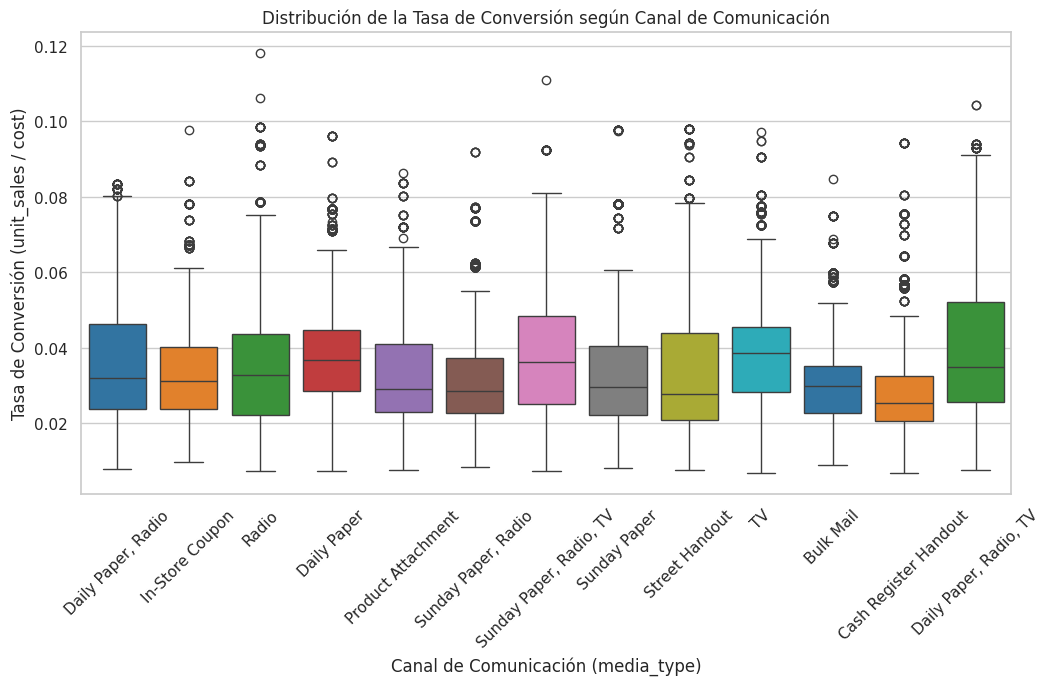

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='media_type', y='conversion_rate', palette='tab10')

plt.xlabel('Canal de Comunicación (media_type)')
plt.ylabel('Tasa de Conversión (unit_sales / cost)')
plt.title('Distribución de la Tasa de Conversión según Canal de Comunicación')

plt.xticks(rotation=45)  # Rota los nombres de los canales para mejor legibilidad
plt.show()
plt.figure(figsize=(12, 6))

Los resultados apoyan la hipótesis inicial: el éxito de las campañas, medido en ingresos y tasa de conversión, efectivamente varía según el canal de comunicación. Algunos canales tienen tasas mas altas lo cual sugiere que es importante elegir el canal adecuado en función de los objetivos de la campaña.

**Las campañas con un Costo por Adquisición (CPA) menor presentan un mayor volumen de unidades vendidas, con una relación inversa significativa entre CPA y unidades vendidas.**

Primero calculamos el CPA y luego graficamos



In [30]:
df['CPA'] = df['cost'] / df['unit_sales(in millions)']

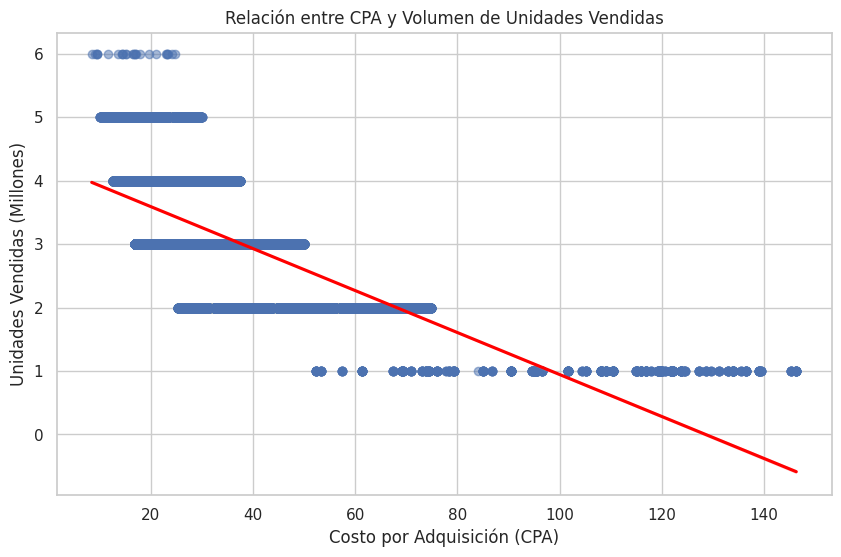

In [31]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Gráfico de dispersión con línea de regresión
sns.regplot(data=df, x='CPA', y='unit_sales(in millions)', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Etiquetas y título
plt.xlabel("Costo por Adquisición (CPA)")
plt.ylabel("Unidades Vendidas (Millones)")
plt.title("Relación entre CPA y Volumen de Unidades Vendidas")
plt.show()

La evidencia visual respalda la hipótesis de que las campañas con un CPA menor tienden a tener un mayor volumen de ventas. Esta observación sugiere que optimizar el CPA podría ser una estrategia eficaz para maximizar las ventas, posiblemente enfocándose en los canales o estrategias que logran menores costos de adquisición.

# **Entrenando modelos**

In [32]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,conversion_rate,CPA
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,0.031591,31.655000
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86,0.050117,19.953333
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16,0.023764,42.080000
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78,0.020881,47.890000
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,0.059067,16.930000


In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

## Variable Objetivo: CPA

In [46]:
# Define las características que se utilizarán para la predicción.
features = ['store_sqft', 'frozen_sqft', 'meat_sqft', 'cost', 'store_sales(in millions)', 'unit_sales(in millions)','cost']
X = df[features]  # Define X como las variables de entrada
y = df['CPA']  # Define y como el CPA (Costo por Adquisición)

# Split data into training and testing sets (only for feature selection)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de RandomForest para selección de características

rf_model = RandomForestRegressor(random_state=42)

selector = RFE(estimator=rf_model, n_features_to_select=5, step=1)

# Ajustar selector a los datos de entrenamiento

selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]

# Definir datos basados en las características seleccionadas

X = df[selected_features]

y = df['CPA']

print("Selected Features:", selected_features)

Selected Features: Index(['store_sqft', 'meat_sqft', 'cost', 'unit_sales(in millions)', 'cost'], dtype='object')


In [52]:
# División de los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluación del modelo RandomForest con las características seleccionadas

rf_model.fit(X_train[selected_features], y_train)

y_pred_rf = rf_model.predict(X_test[selected_features])

mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForestRegressor Evaluation:")

print(f"Mean Squared Error: {mse_rf}")

print(f"R-squared: {r2_rf}")

print()

# Entrenar y evaluar modelo de regresión lineal con las características seleccionadas

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")

print(f"Mean Squared Error: {mse_lr}")

print(f"R-squared: {r2_lr}")

print()

# Entrenar y evaluar modelo de Decision Tree con las características seleccionadas

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor Evaluation:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")

RandomForestRegressor Evaluation:
Mean Squared Error: 0.0029813956501856713
R-squared: 0.9999893592436419

Linear Regression Evaluation:
Mean Squared Error: 44.35649782696795
R-squared: 0.8416893489969198

Decision Tree Regressor Evaluation:
Mean Squared Error: 0.002532691939250197
R-squared: 0.9999909606905564


## **Variable Objetivo: Cost**

In [54]:
# Define las características que se utilizarán para la predicción.
features = ['store_sqft', 'frozen_sqft', 'meat_sqft', 'cost', 'store_sales(in millions)', 'unit_sales(in millions)']
X = df[features]  # Define X como las variables de entrada
y = df['cost']  # Define y como el CPA (Costo por Adquisición)

# Split data into training and testing sets (only for feature selection)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de RandomForest para selección de características

rf_model = RandomForestRegressor(random_state=42)

selector = RFE(estimator=rf_model, n_features_to_select=5, step=1)

# Ajustar selector a los datos de entrenamiento

selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]

# Definir datos basados en las características seleccionadas

X = df[selected_features]

y = df['cost']

print("Selected Features:", selected_features)

Selected Features: Index(['store_sqft', 'frozen_sqft', 'meat_sqft', 'cost',
       'unit_sales(in millions)'],
      dtype='object')


In [55]:
# División de los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluación del modelo RandomForest con las características seleccionadas

rf_model.fit(X_train[selected_features], y_train)

y_pred_rf = rf_model.predict(X_test[selected_features])

mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForestRegressor Evaluation:")

print(f"Mean Squared Error: {mse_rf}")

print(f"R-squared: {r2_rf}")

print()

# Entrenar y evaluar modelo de regresión lineal con las características seleccionadas

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")

print(f"Mean Squared Error: {mse_lr}")

print(f"R-squared: {r2_lr}")

print()

# Entrenar y evaluar modelo de Decision Tree con las características seleccionadas

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor Evaluation:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")

RandomForestRegressor Evaluation:
Mean Squared Error: 2.482210823380023e-10
R-squared: 0.9999999999997252

Linear Regression Evaluation:
Mean Squared Error: 3.465835257893702e-27
R-squared: 1.0

Decision Tree Regressor Evaluation:
Mean Squared Error: 9.581291145943343e-26
R-squared: 1.0


## Conclusiones

Variable Objetivo CPA:

Ambos Random Forest y Decision Tree Regressor muestran un rendimiento muy similar, con un MSE bajo y un R² casi perfecto, lo que indica que son modelos muy efectivos para este conjunto de datos.
El Random Forest puede tener una ligera ventaja sobre el Decision Tree debido a que es menos susceptible al sobreajuste al combinar múltiples árboles.

Un R² cercano a 1 puede ser un indicativo de que los datos presentan relaciones tan simples que no se necesita un modelo complejo para analizar el dataset. Es importante realizar un análisis más profundo de los datos para confirmar si realmente hay patrones lineales o si los modelos están sobreajustando. Si los datos son verdaderamente lineales o tienen poca variabilidad, podría ser útil simplificar el modelo o ajustar los hiperparámetros.

Variable Objetivo Cost:

El hecho de que se presenten R² perfectos son indicativos de que los datos utilizados en este ejercicio son demasiado simples ya que dicho resultado es atípico en la mayoria de los escenarios reales, ademas se corre el riesgo de caer en el overfitting del modelo sobre los datos.

Se recomendaria revisar que los datos no hayan sido manipulados de manera inusual o simplificar los modelos utilizados